In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LogisticRegression

UC Irvine Machine Learning Repository/Bank Marketing
y : 전화 상담 캠페인 성공여부 예측
x : y, duration 제외
model : LR, NN

In [8]:
df = pd.read_csv('./datasets/bank/bank-full.csv', sep=';')
df.shape

(45211, 17)

In [10]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [15]:
df.isna().sum().sum()

0

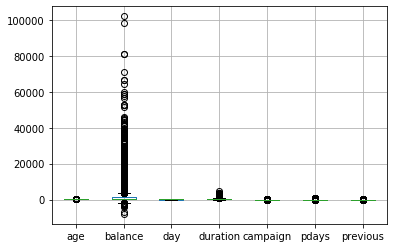

In [16]:
df.boxplot()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
df.shape

(45211, 17)

In [28]:
x = df.drop(columns=['y', 'duration'])
y = df['y']
x.shape, y.shape

((45211, 15), (45211,))

In [30]:
x_dum = pd.get_dummies(x)
y_dum = pd.get_dummies(y)
x_dum.shape, y_dum.shape

((45211, 50), (45211, 2))

In [33]:
y_dum.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [39]:
from sklearn.preprocessing import StandardScaler
xn = x_dum
yn = y_dum.iloc[:, 1]
scaler = StandardScaler()
scaler.fit(xn)
xn = scaler.transform(xn)
np.min(xn), np.mean(xn), np.max(xn)

(-7.3806246098756345, -1.6093334839272358e-18, 119.13598229870267)

In [40]:
x = np.array(xn).astype(np.float32)  #형변환
y = np.array(yn).reshape([-1, 1]).astype(np.float32) #형변환, 2d변환
x.shape, y.shape

((45211, 50), (45211, 1))

LogisticRegression 모델 사용

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression().fit(x, y)
model.score(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8926367476941452

tensorflow 사용하여 회귀예측

In [43]:
from sklearn.metrics import classification_report

In [44]:
report = classification_report(y, model.predict(x))

In [45]:
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     39922
         1.0       0.65      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.77      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



### precision:정밀도, recall:재현율, f1-score:정밀도와 재현율의 조화평균   support:샘플수
### 0 recall : 돈을 갚은 사람은 다 찾았지만
### 1 recall : 돈을 갚지 않은 사람은 하나도 찾지 못함

In [47]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
tf.reset_default_graph()
net = slim.fully_connected(x, 10)
hypothesis = slim.fully_connected(net, 1, activation_fn=tf.nn.sigmoid)
cost = tf.reduce_mean((y-hypothesis)**2)
#cost = tf.reduce_mean(tf.losses.sparse_softmax_cross_entropy(label=tf.cast(yn, tf.int64), logits=h))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W0917 16:49:07.651073  7304 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
for i in range(10000):
    sess.run(train)
    if i%1000==0:
        print(i, sess.run(cost))

0 0.26684937
1000 0.08790045
2000 0.08598268
3000 0.08512852
4000 0.08459214
5000 0.084195524
6000 0.08387692
7000 0.08361389
8000 0.08339018
9000 0.083195046


In [49]:
p = np.round(sess.run(hypothesis))
print(classification_report(yn, p))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.66      0.23      0.34      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.61      0.64     45211
weighted avg       0.88      0.90      0.87     45211



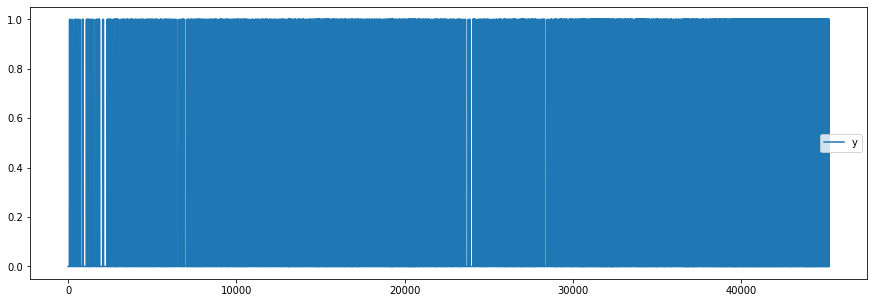

In [51]:
plt.figure(figsize=(15,5))
plt.plot(yn, label='y')
##plt.plot(p, label='p')
plt.legend()

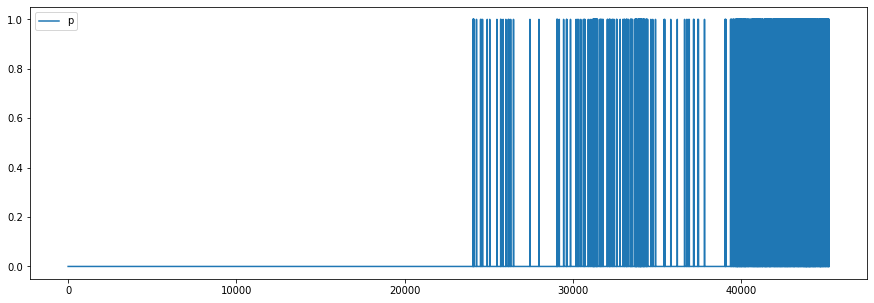

In [53]:
plt.figure(figsize=(15,5))
##plt.plot(yn, label='y')
plt.plot(p, label='p')
plt.legend()